In [3]:
import numpy as np
from numpy import linspace,array, zeros,log,exp,sin,cos,sqrt,pi,e, ones, arange, shape, zeros, real, imag

S = np.loadtxt('H-H1_GWOSC_4KHZ_R1-1126259447-32.txt')
Fs = 4096 # 4KHz Sampling frequency
dT = 1/Fs
gps_time = 1126259447 + arange(len(S))*dT # Array with GPS time of observations (start time in file name)
print(gps_time)
gpsstart = 1126259462-0.1 # Time to begin excerpt
f = S[(gps_time>=gpsstart) & (gps_time<=gpsstart+1)] # Excerpt 1 sec of data
f

[1.12625945e+09 1.12625945e+09 1.12625945e+09 ... 1.12625948e+09
 1.12625948e+09 1.12625948e+09]


array([-2.06275531e-19, -1.81164766e-19, -1.57734707e-19, ...,
       -2.03104586e-19, -2.00987906e-19, -2.04786198e-19])

In [ ]:

S2 = np.loadtxt('White.txt')
Fs = 4096 # 4KHz Sampling frequency
dT = 1/Fs
gps_time = 1126259447 + arange(len(S2))*dT # Array with GPS time of observations (start time in file name)
print(gps_time)
gpsstart = 1126259462-0.1 # Time to begin excerpt
f2 = S2[(gps_time>=gpsstart) & (gps_time<=gpsstart+1)] # Excerpt 1 sec of data
f2



In [ ]:
from matplotlib.pyplot import plot,xlabel,ylabel,specgram, ylim,xlim, yscale
S3 = np.loadtxt('White.txt')
powerSpectrum, freqenciesFound, time, imageAxis = specgram(S3,Fs=Fs, mode='magnitude', vmin=-100, cmap='inferno')
xlabel('Time')
ylabel('Frequency')
ylim(10,500)
xlim(0,1)
yscale('log')


In [ ]:
from numpy import linspace,array, zeros,log,exp,sin,cos,sqrt,pi,e, ones, arange, shape, zeros, real, imag
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot, title, tight_layout
from scipy.fftpack import fft


S4 = np.loadtxt('White.txt')
Fs = 4096 # 4KHz Sampling frequency
dT = 1/Fs
nt = len(S4) # number of samples in record
T = nt*dT # Time period of record
t=arange(0,T,dT) # time array in seconds using arange(start,stop,step)
freqf = 1/T # Hz fundamental frequency (lowest frequency)
nfmax = int(nt/2) # number of frequencies resolved by FFT
freqmax = freqf*nfmax # Max frequency (Nyquist)
freq = arange(0,freqmax,freqf) # frequency array using arange(start,stop,step)
print('Fundamental period and Nyquist Freq',T, freqmax)

2048


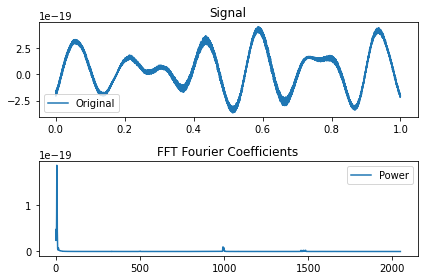

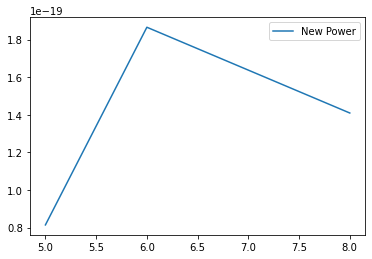

In [4]:

# take FFT
F = fft(f)
# get the coeffs
a = 2*real(F[:nfmax])/nt # form the a coefficients
a[0] = a[0]/2
b = -2*imag(F[:nfmax])/nt # form the b coefficients
p = sqrt(a**2 + b**2) # form power spectrum

q = max(p)
pp = []
freq1 = []
print(len(p))
for i in range(len(p)):
    if p[i] > q*0.4:
        pp.append(p[i])
        freq1.append(freq[i])

figure(1)
subplot(2,1,1)
plot(t,f, label='Original')
# plot(t,fclean, label='Clean')
title('Signal')
legend()
subplot(2,1,2)
plot(freq, p,'-', label='Power')
legend()
title('FFT Fourier Coefficients')
tight_layout() # prevent squished plot (matplotlib kludge)

figure(2)
plot(freq1,pp,'-', label='New Power')
legend()
